# Se aplicará un algoritmos no supervisado Kmeans para agrupar los datos de la estadística utilizada. Se analizará con el resultado si las regiones son un buen separador de características considerando el análisis de ocurrencia de enfermedades 


In [1]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [3]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [4]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
X1.shape

(25637, 97)

In [5]:
# Estandariza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X1)

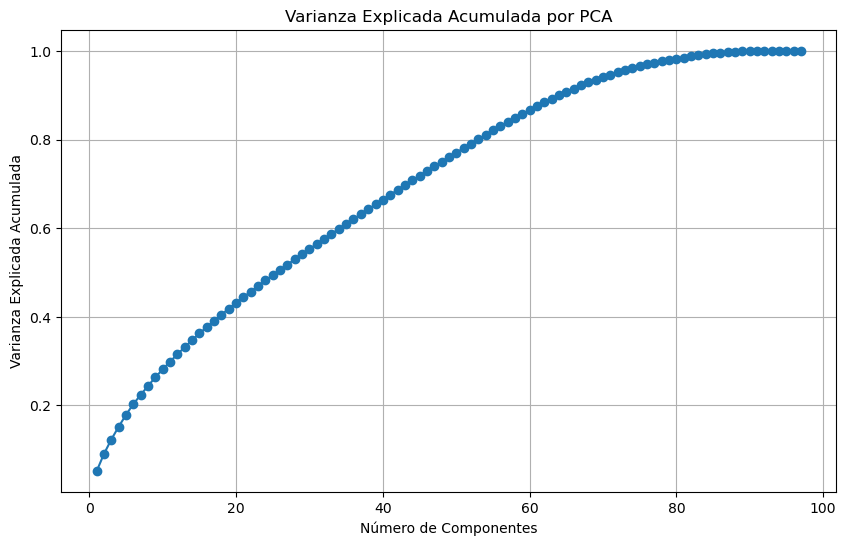

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 53 componentes.


In [6]:
# Inicializar PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

In [7]:
# Reduccion de dimensionalidad

pca = PCA(n_components=53)  # Selecciona el número de componentes principales
X_pca = pca.fit_transform(X)

In [8]:

# Se añade la información de los componentes principales al DataFrame original
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
                                      'PC50', 'PC51', 'PC52', 'PC53'])
df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [9]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,3.745968,1.238813,-0.731948,3.507155,-0.044644,1.043916,1.708954,-1.958185,-0.384510,-1.041252,...,0.865713,-0.205571,0.369621,0.484284,-0.569935,0.424878,0.044316,-0.990728,0.613667,-1.322558
1,2.234440,2.912021,0.862241,1.523889,0.793788,1.112900,-2.793993,-1.822859,3.398469,1.709975,...,0.611192,0.314538,-0.140645,-0.146755,-0.254318,-0.555591,0.118667,-1.095749,0.127955,-0.217652
2,1.769411,2.443795,0.620198,0.171908,-2.141144,-1.535529,-1.438940,-2.277644,1.452998,-0.368605,...,0.674617,-0.267648,0.692760,0.295816,0.217134,1.096963,-0.740295,0.426971,-0.101966,-1.096964
3,-2.796557,2.928648,0.810214,1.529489,-2.966372,-0.453021,-0.812745,-0.751564,1.934300,-1.099190,...,-0.775275,1.110320,-0.140100,1.067940,1.021395,1.514727,-0.163966,1.340147,4.166125,0.342542
4,2.031646,0.920446,1.806069,0.311075,-2.452849,-2.067967,2.481580,-1.375969,1.151590,0.005659,...,0.108034,0.200173,-0.093562,1.390210,-0.659096,2.075944,-0.001693,0.702963,0.720123,-1.289134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.320212,-2.063616,-0.853636,-1.940219,-2.019431,0.901131,-0.783898,-0.567748,0.597226,2.518817,...,-0.789703,-0.455393,-1.800202,0.758998,-2.676646,0.395950,1.222554,-0.067155,0.706615,-1.951103
25633,-1.155429,1.066290,2.054003,0.826785,2.145057,-0.374288,-1.043080,0.213363,-1.626799,0.866158,...,0.008046,0.151775,-0.433992,0.043566,0.094832,0.217752,-0.318470,-0.033142,0.375111,-0.679449
25634,1.303455,1.513065,0.912939,-1.917784,-0.937825,2.126826,-1.712107,3.014825,-1.072255,-0.431200,...,0.172528,0.093682,-0.180599,1.008145,-0.055001,1.261391,0.725157,1.752472,-1.540170,-0.465564
25635,1.752902,0.210653,0.357379,-1.707066,0.635601,-0.891374,-2.449079,3.026048,-0.026904,1.593812,...,-0.206222,0.164079,-0.658043,0.167652,0.792762,0.578427,-0.069047,1.621475,-0.674691,-0.182450


In [10]:
# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada')
for i in range(53):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.05148129591176186
PC2: 0.03915092890711712
PC3: 0.03245296060620501
PC4: 0.028869748395539286
PC5: 0.026800979165009366
PC6: 0.02440280022789826
PC7: 0.020727687167171265
PC8: 0.02015626108857249
PC9: 0.01965374744229259
PC10: 0.017814583012401353
PC11: 0.017333365496134536
PC12: 0.01670973789090806
PC13: 0.016060910461396606
PC14: 0.015733334605483942
PC15: 0.015130324864959927
PC16: 0.014422348838515172
PC17: 0.014028357027577579
PC18: 0.013800709987968096
PC19: 0.013609916887096627
PC20: 0.013197306700616168
PC21: 0.012844895998932451
PC22: 0.012599536270593476
PC23: 0.012481985547498917
PC24: 0.012455130983052402
PC25: 0.012013385934849052
PC26: 0.01198148973834554
PC27: 0.011870559566756127
PC28: 0.011773945339776319
PC29: 0.011617778324072577
PC30: 0.011563528802143327
PC31: 0.011391863978667774
PC32: 0.011342815531052635
PC33: 0.011199550178685035
PC34: 0.011157663501676674
PC35: 0.011119062834109133
PC36: 0.011076299865397729
PC37: 0.011024681114945017

In [11]:

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(varianza_acumulada)

[0.0514813  0.09063222 0.12308519 0.15195493 0.17875591 0.20315871
 0.2238864  0.24404266 0.26369641 0.28151099 0.29884436 0.3155541
 0.33161501 0.34734834 0.36247867 0.37690101 0.39092937 0.40473008
 0.41834    0.4315373  0.4443822  0.45698174 0.46946372 0.48191885
 0.49393224 0.50591373 0.51778429 0.52955823 0.54117601 0.55273954
 0.56413141 0.57547422 0.58667377 0.59783143 0.6089505  0.6200268
 0.63105148 0.64202261 0.65296415 0.66382929 0.67464727 0.68543923
 0.69616496 0.70674428 0.71725818 0.72775329 0.7381472  0.74848526
 0.75873517 0.76897227 0.77902001 0.78903965 0.7989813 ]


### Se observa que la suma acumulada de los primeros 53 componentes explica mas del 80% de los datos
    

# Analisis de las cargas variables que afectan cada componente en mayor medida

In [15]:
# Cargas de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(53)], index=X1.columns)

In [16]:

# Filtrar las cargas que tengan una magnitud mayor al umbral (0.1 para un 10%)
threshold = 0.3
loadings_filtered = loadings[(loadings.abs() >= threshold).any(axis=1)]

# Mostrar las cargas filtradas
print(loadings_filtered)

                                         PC1       PC2       PC3       PC4  \
tamanio_aglomerado_2                0.023900  0.024354  0.026502  0.022742   
tamanio_aglomerado_4               -0.053468 -0.050981 -0.025274 -0.055287   
tipo_vivienda_2                    -0.006278 -0.070147  0.003533 -0.054265   
tipo_vivienda_4                     0.009667 -0.014552  0.001881  0.010946   
tipo_vivienda_5                     0.015980  0.005893  0.005821 -0.002573   
...                                      ...       ...       ...       ...   
consumo_5porc_fv_2                 -0.029982 -0.101688  0.059444 -0.016773   
consumido_alcohol_99               -0.000961 -0.003943  0.007508  0.014361   
familiares_directos_diabetes_99    -0.013759 -0.019786  0.036321 -0.049400   
familiares_no_directos_diabetes_2  -0.019570  0.048320 -0.031236 -0.013273   
familiares_no_directos_diabetes_99 -0.025569  0.009645  0.057781 -0.068392   

                                         PC5       PC6       PC

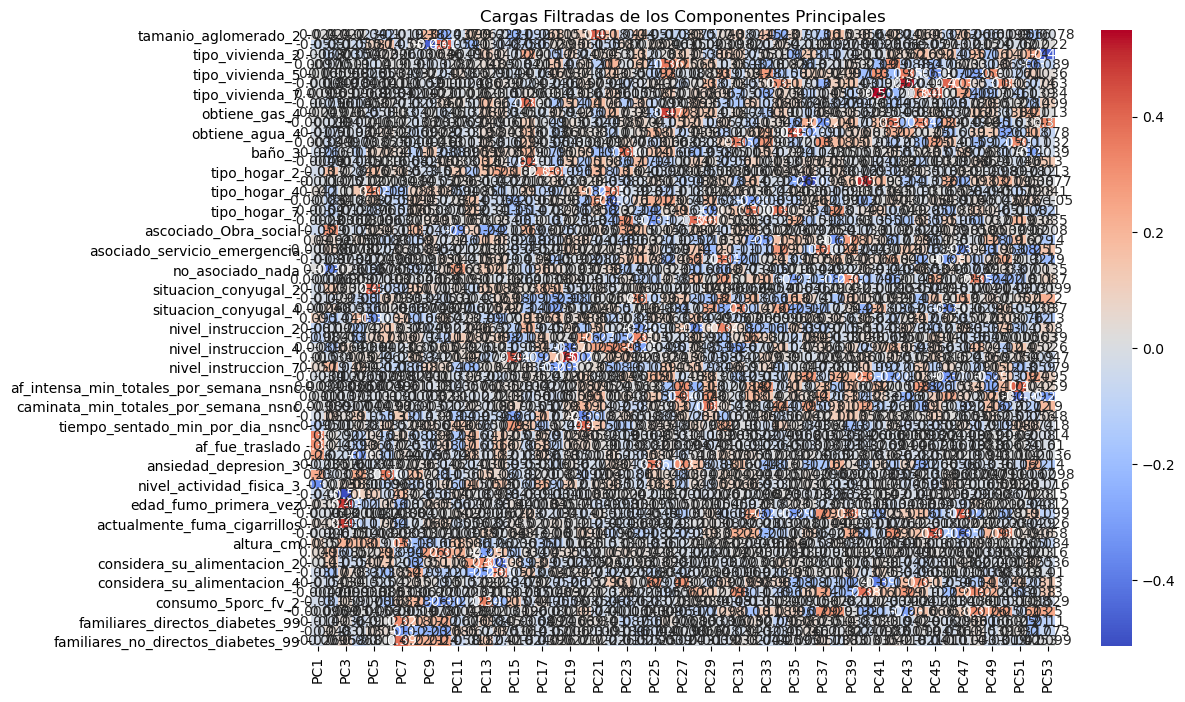

In [17]:
plt.figure(figsize=(25, 8))
sns.heatmap(loadings_filtered, annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los Componentes Principales')
plt.show()

### Se observa:
1. PC1 = no sabe edad fumo primera vez
2. PC2 = profesional indica sobrepeso
3. PC3 = relacionada a actividad fisica y moderada por semana
4. PC4 = actualmente fuma + edad fumo primera vez
5. PC5 = region
6. PC6 = actividad física intensa por semana
7. PC7 = edad + peso + altura // negativa cantidad de compoenntes
8. PC8 = negativa: peso y altura
9. PC9 = af moderada veces por semana y minutos por semana
10. PC10 = + tiempo sentado por dia+  ingresos 
11. PC11 = cantidad de componentes + ingresos + fv


# Aplicamos método Elbow para determinar cantidad óptima de clusters

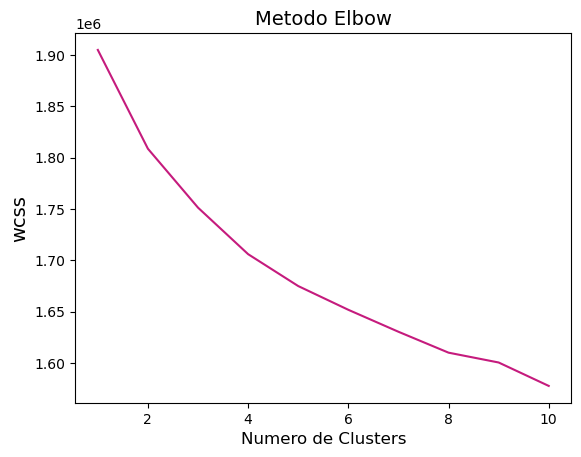

In [18]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_df)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()


# El codo se encuentra entre 3 y 5 clusters. 4 sería el punto central

# Análisis de Silouette

In [19]:
from sklearn.metrics import silhouette_score

In [20]:

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(pca_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_df, labels, metric='euclidean'))

    
    
    
# Análisis de Silueta
#for n in range(2, 11):
#    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
#    labels = kmeans.fit_predict(X_pca)
#    silhouette_avg = silhouette_score(X_pca, labels)
#    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

C:\Users\diana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\diana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

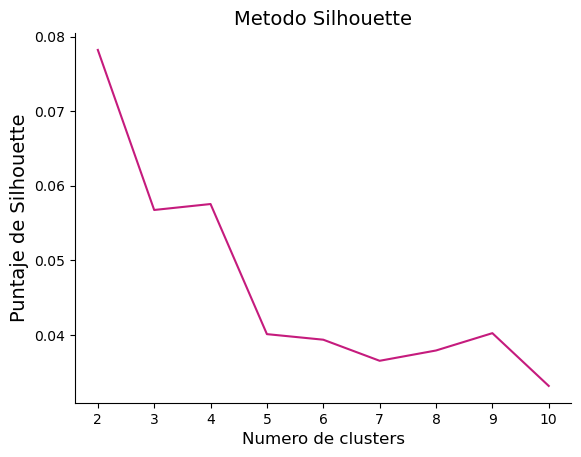

In [21]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [22]:
# Análisis de Silueta
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

Número de clusters: 2, Score de Silueta: 0.07821626142427401
Número de clusters: 3, Score de Silueta: 0.056746830631965235
Número de clusters: 4, Score de Silueta: 0.053896842823067705
Número de clusters: 5, Score de Silueta: 0.04015129899816318
Número de clusters: 6, Score de Silueta: 0.04194030757308665
Número de clusters: 7, Score de Silueta: 0.04575354633472366
Número de clusters: 8, Score de Silueta: 0.04060576223059079
Número de clusters: 9, Score de Silueta: 0.042943152619768325
Número de clusters: 10, Score de Silueta: 0.038383638555994186


In [ ]:
# Ahora aplica KMeans a los datos reducidos agrupando en 3 clusters

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(pca_df)

In [ ]:

# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans.labels_

In [ ]:
pca_df

In [ ]:
# Calcular la varianza dentro de cada cluster para cada componente principal
variance_within_cluster = pca_df.groupby('Cluster').var()

print(variance_within_cluster)

In [ ]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

In [ ]:
#intentamos 2 clusters


# KMeans con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10)
pca_df['Cluster_2'] = kmeans_2.fit_predict(X_pca)


In [ ]:

# Visualización para 2 clusters
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster_2', palette='Set1')
plt.title('Clusters en el Espacio de Componentes Principales (2 Clusters)')
plt.show()

In [ ]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts2 = pca_df['Cluster_2'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts2)